# Advertising - Multiple Linear Regression

Bu projede TV, Radyo ve Gazete ilanlarına ne kadar yatırım yapılacağını bulmaya çalışacağız..

### Gerekli paketleri ekliyoruz

In [1]:
import pandas as pd # Data dosyalarini okuma paketi
pd.set_option("display.max_columns",55)

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet

import warnings
warnings.filterwarnings('ignore')

### Verileri projeye ekliyoruz

In [2]:
df=pd.read_csv("advertising.csv")

### EDA - Keşfedici veri analizi

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# Boş veri yok güzel. Tüm veriler sayı olduğuna göre hemen modellemeye geçebiliriz.
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


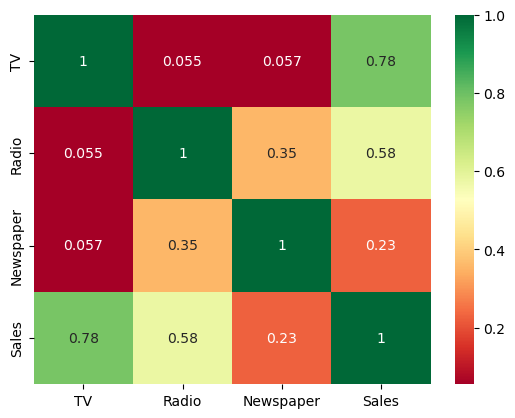

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn');

In [7]:
x=df.drop("Sales", axis=1)
y=df[["Sales"]]

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [9]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.983602,0.719432,0.614574
XGBRegressor,0.972470,0.932166,0.725829
Extra Tree,0.944786,1.320133,0.997500
Decision Tree,0.928842,1.498666,1.045000
KNeighborsRegressor,0.910620,1.679625,1.189000
Lasso,0.900401,1.773046,1.452202
ElasticNet,0.899961,1.776959,1.456659
Ridge,0.899438,1.781599,1.460766
Linear,0.899438,1.781600,1.460757


### Tavsiye edebilecek yeni bir veri seti oluşturalım. 

* Tv 0-300
* Radyo 0-50
* Gazete 0-114

Veriler yukarıdaki aralıklarda olduğuna göre veri setimiz her bir değeri karşılayacak kayıtları içermelidir.

In [10]:
xt = pd.DataFrame(np.array(np.meshgrid(range(0, 300, 5), range(0, 50, 5), range(0, 120, 5))).T.reshape(-1, 3), columns=['TV', 'Radio', 'Newspaper'])
xt.head()

,TV,Radio,Newspaper
0,0,0,0
1,0,5,0
2,0,10,0
3,0,15,0
4,0,20,0


### GradientBoost modeli ile yeniden eğitip tahmin verilerimizi deneyelim

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [12]:
g=GradientBoostingRegressor()

In [13]:
model=g.fit(x_train,y_train)

In [14]:
gTahmin=model.predict(x_test)

In [15]:
r2_score(y_test,gTahmin)

0.9841819879897671

In [16]:
mean_squared_error(y_test,gTahmin)**.5

0.706592743398638

In [17]:
type(y_test), type(gTahmin)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [18]:
gt=gTahmin.reshape((40, 1))

In [19]:
residuals=y_test-gt

<Axes: ylabel='Count'>

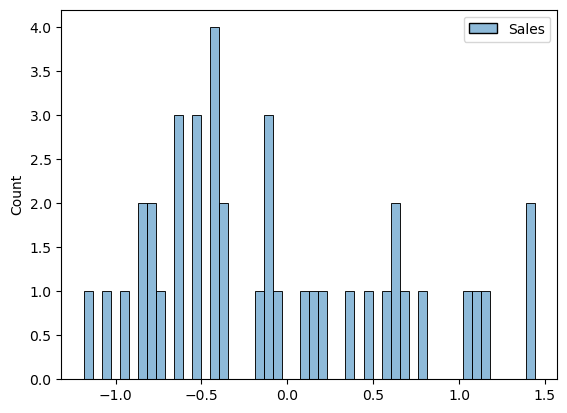

In [20]:
sns.histplot(residuals, bins=50)

<Axes: xlabel='Sales', ylabel='Density'>

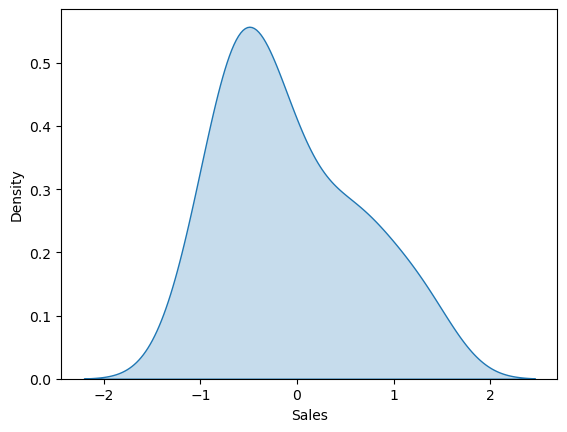

In [21]:
sns.kdeplot(x=residuals["Sales"], fill=True)

In [22]:
tahmin=model.predict(xt)

In [23]:
tahmin.shape

(14400,)

In [24]:
xt["Sales"]=tahmin

In [25]:
xt.head()

,TV,Radio,Newspaper,Sales
0,0,0,0,2.046310
1,0,5,0,2.445811
2,0,10,0,2.490507
3,0,15,0,2.426741
4,0,20,0,2.663744


In [26]:
xt.sort_values("Sales", ascending=False).head()

,TV,Radio,Newspaper,Sales
8389,290,45,65,26.252549
8399,295,45,65,26.252549
7789,290,45,60,26.203288
8999,295,45,70,26.202653
8989,290,45,70,26.202653


In [34]:
def satis_tahmin(tv, rd, np):
    denek=[[tv,rd,np]]
    return model.predict(denek)

In [35]:
# Sadece TV ye 300 reklam verirsek
satis_tahmin(300,0,0)

array([12.21319048])

In [36]:
# Sadece Radyoya ye 50 reklam verirsek
satis_tahmin(0,50,0)

array([2.34848183])

In [37]:
# Sadece Gazeteye 100 reklam verirsek
satis_tahmin(0,0,100)

array([3.29211114])

In [39]:
# Hepsinden 100 reklam
satis_tahmin(100,100,100)

array([15.31902857])

## Sonuç

Gazete, Dergi ve Televizyon reklamlarının miktarına göre ne kadar satış yapılacağını tahmin eden model geliştirilmiştir.

### Bonus

Reklam sayılarına göre tahmin yapan bir `Gradio` uygulaması.

In [43]:
import gradio as gr

def satis_tahmin(tv, rd, np):
    denek=[[tv,rd,np]]
    return model.predict(denek)

iface = gr.Interface(
    fn=satis_tahmin,
    inputs=[
        gr.Number(label="TV Reklamları"),
        gr.Number(label="Rayo Reklamları"),
        gr.Number(label="Gazete Reklamları")
    ],
    outputs="number",
    title="Satış Tahmin Aracı",
    description="Reklam sayılarını girin ve sonucu görün."
)

iface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
